In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from rdkit.ML.Scoring import Scoring
%run DOCK_OutputParser.ipynb
%run Analysis_Base.ipynb

In [2]:
### EDITABLE CELL
    # Edit this cell to pick the source folder (ideally not needed, see other notebooks for Xtal and AF2)
    # and results from different individual structures. Common groupings are given below. Uncomment only
    # one at a time.
### EDITABLE CELL

DOCKOUT_FOLDER="optSPIB_MD3/dockout/"
outfiles=sorted([f for f in os.listdir(DOCKOUT_FOLDER) if f.endswith(".mol2")])
docking_outputs=[]

all_tdos=np.array([DOCKOutput(DOCKOUT_FOLDER+"/"+of) for of in outfiles],dtype=object)
#all_tdos=list(all_tdos) # All
#all_tdos=list(all_tdos[[0,1,2,3]]) # Well 0
#all_tdos=list(all_tdos[[4,5,6,7]]) # Well 1
#all_tdos=list(all_tdos[[8,9,10,11]]) # Well 2
#all_tdos=list(all_tdos[[12,13,14,15]]) # Well 3
#all_tdos=list(all_tdos[[16,17,18,19]]) # Well 4
all_tdos=list(all_tdos[[0,1,4,5,8,9,12,13,16,17]]) # pLDDT Rank 1
#all_tdos=list(all_tdos[[2,3,6,7,10,11,14,15,18,19]]) # pLDDT Rank 2
#all_tdos=list(all_tdos[[4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19]]) # NOT Well 0
#all_tdos=list(all_tdos[[1,2,3]]) # Manually pick (Multiple)
#all_tdos=list([all_tdos[3]]) # Manually pick (Single)

#print(outfiles) # Run this if you want to see the ordering of the structure files. Useful to manually get indices.

Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 596 elements and found 596 scores (must match)
Loaded 601 elements and found 601 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and found 603 scores (must match)
Loaded 603 elements and foun

In [3]:
objects=list(all_tdos[0].score_dict.keys())
N_MAX=len(objects)
N_TOT=605 # Differs from N_MAX because some ligands consistently fail to dock everywhere (<10 of 605)
N_GOOD=10
N_CHECK=40 # Check at top ???
print("Identified value of N_max:",N_MAX)
print("Total no. of ligands:",N_TOT)
print(len(all_tdos),"files loaded")

Identified value of N_max: 603
Total no. of ligands: 605
10 files loaded


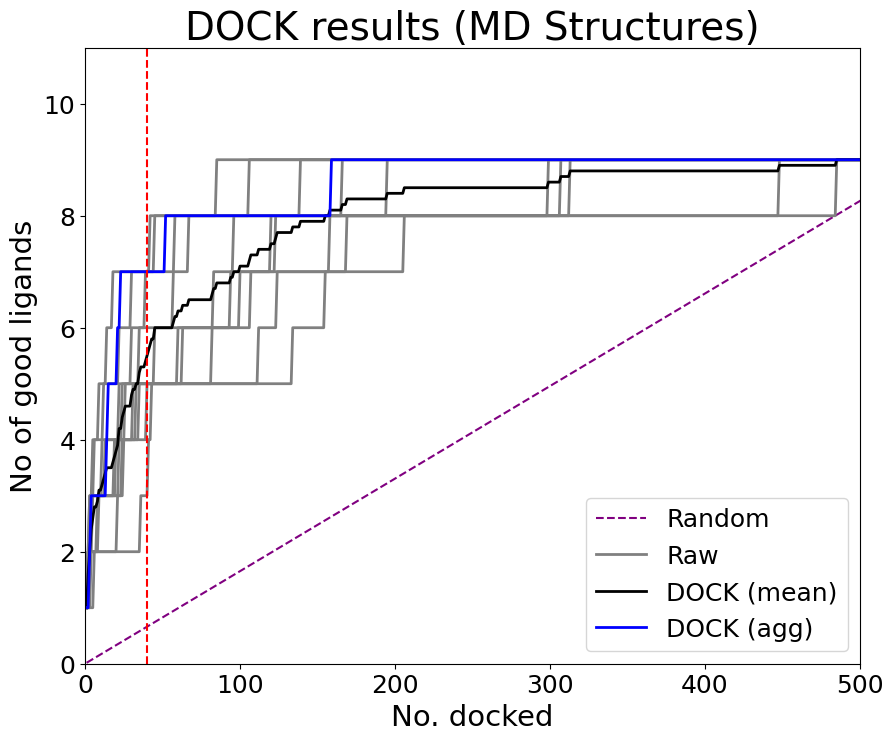

In [4]:
cdo,no_top,comb_err,raw_err,agg_err,random_er=return_analysis_of(all_tdos,N_GOOD,N_TOT,N_MAX)
plot_all(no_top,raw_err,agg_err,comb_err,random_er,N_GOOD,N_CHECK)
np.save(DOCKOUT_FOLDER+"/docking_data.npy",np.stack([no_top,no_top*comb_err]))
np.save(DOCKOUT_FOLDER+"/cdo.npy",cdo)

In [5]:
objects=list(cdo.score_dict.keys())
bitmatch=np.array(["oleObject" in s for s in objects],dtype=bool)
v1=np.arange(len(bitmatch))+1
bedroc_in=np.stack((v1,bitmatch),dtype=float,axis=1)
bedroc_in=bedroc_in[:5000]
print("BEDROC Scores from",len(bedroc_in),"scores")

alphas=np.arange(0.1,50,0.1)
bedroc_scores=[]
for al in alphas:
    bedroc_scores.append(Scoring.CalcBEDROC(bedroc_in,1,al))
bedroc_scores=np.array(bedroc_scores)
print(bedroc_scores.shape)
np.save(DOCKOUT_FOLDER+"/bedrock_scores.npy",np.stack((alphas,bedroc_scores)))

BEDROC Scores from 603 scores
(499,)


BEDROC 20: 0.613


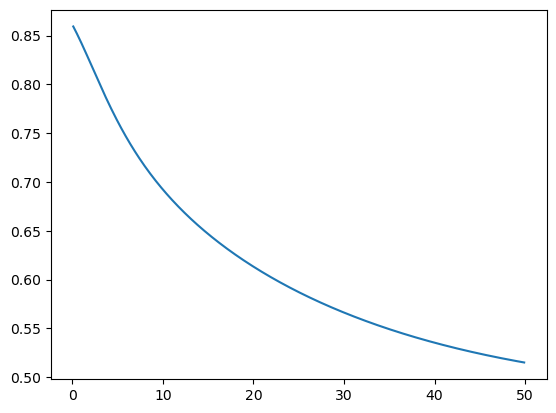

In [6]:
print("BEDROC 20:",round(Scoring.CalcBEDROC(bedroc_in,1,20),3))
plt.plot(alphas,bedroc_scores)